In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = r"path"

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_datagen = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256,256),
    subset="training",
    batch_size=2
)

test_datagen = test_datagen.flow_from_directory(
    base_dir,
    target_size=(256,256),
    subset="validation",
    batch_size=2
)

Found 14028 images belonging to 4 classes.
Found 1557 images belonging to 4 classes.


(2, 256, 256, 3)
[0. 0. 1. 0.]


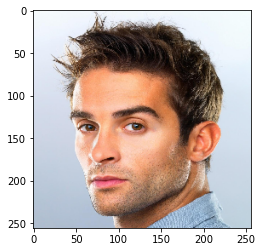

In [2]:
import matplotlib.pyplot as plt

for _ in range(1):
    img,label = test_datagen.next()
    print(img.shape)
    plt.imshow(img[0])
    print(label[0])
    plt.show()

In [3]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers, activations

In [4]:
model = Sequential()

model.add(layers.Conv2D(filters=32, activation="relu", kernel_size=(3,3), input_shape = (256,256,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, activation="relu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64, activation="relu", kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [8]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
loss = tf.keras.losses.CategoricalCrossentropy()

In [9]:
model.compile(optimizer=optimizer, loss=loss, metrics=["mse", "accuracy"])

In [10]:
result = model.fit(train_datagen, epochs=6, verbose=1, validation_data= test_datagen)

Epoch 1/6
1823/7014 [======>.......................] - ETA: 22:02 - loss: 0.8245 - mse: 0.1148 - accuracy: 0.6264-  - ETA: 22:20 - loss: 0.8287 - mse: 0.1154 - accur - ETA: 22:

C:\Users\berka\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7014/7014 [==============================] - 1724s 246ms/step - loss: 0.6266 - mse: 0.0881 - accuracy: 0.7284 - val_loss: 0.4572 - val_mse: 0.0645 - val_accuracy: 0.8157
Epoch 2/6
7014/7014 [==============================] - 1570s 224ms/step - loss: 0.3809 - mse: 0.0549 - accuracy: 0.8430 - val_loss: 0.4026 - val_mse: 0.0582 - val_accuracy: 0.8266
Epoch 3/6
7014/7014 [==============================] - 1836s 262ms/step - loss: 0.2754 - mse: 0.0405 - accuracy: 0.8842 - val_loss: 0.3736 - val_mse: 0.0528 - val_accuracy: 0.8497
Epoch 4/6
7014/7014 [==============================] - 1861s 265ms/step - loss: 0.1932 - mse: 0.0279 - accuracy: 0.9231 - val_loss: 0.4108 - val_mse: 0.0509 - val_accuracy: 0.8645
Epoch 5/6
7014/7014 [==============================] - 1551s 221ms/step - loss: 0.1250 - mse: 0.0179 - accuracy: 0.9515 - val_loss: 0.4770 - val_mse: 0.0555 - val_accuracy: 0.8484
Epoch 6/6
7014/7014 [==============================] - 1060s 151ms/step - loss: 0.0728 - mse: 0.0102 - accurac

In [8]:
test_a = model.predict(test_datagen)
t = []
print(test_datagen.class_indices)
for i in test_a:
    t.append(np.argmax(i))

x=zip(t, test_datagen.labels)
for i,j in x:
    print("Tahmin:{} Gerçek:{}".format(i,j))

{'cat': 0, 'dog': 1, 'human': 2, 'somewhere': 3}
Tahmin:0 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:3 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:1 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:0 Gerçek:0
Tahmin:2 Gerçek:0
Tahmin:0 Gerçek

In [39]:
from PIL import Image
from skimage import transform

image = Image.open(r"dog.jpg")

def one_image(path):
    image=Image.open(path)
    image=np.array(image).astype("float32")/255
    image=transform.resize(image, (256,256,3))
    image=np.expand_dims(image, axis=0)
    print(test_datagen.class_indices)
    return image

image = one_image("dog.jpg")
pred = model.predict(image)
print(pred)
np.argmax(pred)

{'cat': 0, 'dog': 1, 'human': 2, 'somewhere': 3}
[[1.1252623e-04 9.9988651e-01 3.3058662e-08 9.1394827e-07]]


1

In [26]:
model.save("path")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: save_model/10_epoch/assets


In [27]:
model.save("path")

In [7]:
model.load_weights("path")

In [30]:
model.evaluate(test_datagen)

151/779 [====>.........................] - ETA: 43s - loss: 0.5374 - mse: 0.0550 - accuracy: 0.8642

KeyboardInterrupt: 